In [ ]:
import tensorflow as tf
import numpy as np
import csv
import random
import pandas as pd
import warnings
import warnings

# Ignore pandas warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras import regularizers
from keras import optimizers

In [ ]:
# For reproducibility, create seeds
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

Whole Dataset

In [ ]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('kd_whole_norm.csv')

train, test = train_test_split(data, test_size=0.1, random_state=42)
train.to_csv('kd_train.csv', index=False)
test.to_csv('kd_test.csv', index=False)
print(len(train))
# smiles_train = data_train['Ligand SMILES'].tolist()
# proteins_train = data_train['BindingDB Target Chain  Sequence'].tolist()
# labels_train = data_train['Kd (nM)'].tolist()

# smiles_test = data_test['Ligand SMILES'].tolist()
# proteins_test = data_test['BindingDB Target Chain  Sequence'].tolist()
# labels_test = data_test['Kd (nM)'].tolist()

56236


In [ ]:
# Load the train data
data_train = []
with open('kd_train.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader) # skip the header
  for row in reader:
    triplet = []
    triplet.append(row[0])
    triplet.append(row[1])
    triplet.append(row[2])
    data_train.append(triplet)
  print(len(data_train))

56236


In [ ]:
# Load the test data
data_test = []
with open('kd_test.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader) # skip the header
  for row in reader:
    triplet = []
    triplet.append(row[0])
    triplet.append(row[1])
    triplet.append(row[2])
    data_test.append(triplet)
  print(len(data_test))

6249


In [ ]:
smiles_train = []
proteins_train = []
labels_train = []
random.shuffle(data_train)
for triplet in range(len(data_train)):
  smiles_train.append(data_train[triplet][0])
  proteins_train.append(data_train[triplet][1])
  labels_train.append(data_train[triplet][2])

In [ ]:
smiles_test = []
proteins_test = []
labels_test = []
random.shuffle(data_test)
for triplet in range(len(data_test)):
  smiles_test.append(data_test[triplet][0])
  proteins_test.append(data_test[triplet][1])
  labels_test.append(data_test[triplet][2])

In [ ]:
print(smiles_train[0])
print(proteins_train[0])
print(labels_train[0])

Clc1ccc(cc1)C(c1c[nH]c(c1)-c1ccc(Cl)cc1)n1ccnc1
MFIEAIVLALTALILYSVYSVKSFNTTRPTDPPVYPVTVPFLGHIVQFGKNPLEFMQRCKRDLKSGVFTISIGGQRVTIVGDPHEHSRFFSPRNEILSPREVYTIMTPVFGEGVAYAAPYPRMREQLNFLAEELTIAKFQNFVPAIQHEVRKFMAENWKEDEGVINLLEDCGAMIINTACQCLFGEDLRKRLNARHFAQLLSKMESSLIPAAVFMPWLLRLPLPQSARCREARAELQKILGEIIVAREKEEASKDNNTSDLLGGLLKAVYRDGTRMSLHEVCGMIVAAMFAGQHTSTITTSWSMLHLMHPKNKKWLDKLHKEIDEFPAQLNYDNVMDEMPFAERCVRESIRRDPPLLMVMRMVKAEVKVGSYVVPKGDIIACSPLLSHHDEEAFPNPRLWDPERDEKVDGAFIGFGAGVHKCIGQKFALLQVKTILATAFREYDFQLLRDEVPDPDYHTMVVGPTLNQCLVKYTRKKKLPS
-0.9450704590925664


In [ ]:
print(smiles_test[0])
print(proteins_test[0])
print(labels_test[0])

CC[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4[C@H]3CC[C@]2(C)[C@H]1C(=O)CO
MTELKAKGPRAPHVAGGPPSPEVGSPLLCRPAAGPFPGSQTSDTLPEVSAIPISLDGLLFPRPCQGQDPSDEKTQDQQSLSDVEGAYSRAEATRGAGGSSSSPPEKDSGLLDSVLDTLLAPSGPGQSQPSPPACEVTSSWCLFGPELPEDPPAAPATQRVLSPLMSRSGCKVGDSSGTAAAHKVLPRGLSPARQLLLPASESPHWSGAPVKPSPQAAAVEVEEEDGSESEESAGPLLKGKPRALGGAAAGGGAAAVPPGAAAGGVALVPKEDSRFSAPRVALVEQDAPMAPGRSPLATTVMDFIHVPILPLNHALLAARTRQLLEDESYDGGAGAASAFAPPRSSPCASSTPVAVGDFPDCAYPPDAEPKDDAYPLYSDFQPPALKIKEEEEGAEASARSPRSYLVAGANPAAFPDFPLGPPPPLPPRATPSRPGEAAVTAAPASASVSSASSSGSTLECILYKAEGAPPQQGPFAPPPCKAPGASGCLLPRDGLPSTSASAAAAGAAPALYPALGLNGLPQLGYQAAVLKEGLPQVYPPYLNYLRPDSEASQSPQYSFESLPQKICLICGDEASGCHYGVLTCGSCKVFFKRAMEGQHNYLCAGRNDCIVDKIRRKNCPACRLRKCCQAGMVLGGRKFKKFNKVRVVRALDAVALPQPVGVPNESQALSQRFTFSPGQDIQLIPPLINLLMSIEPDVIYAGHDNTKPDTSSSLLTSLNQLGERQLLSVVKWSKSLPGFRNLHIDDQITLIQYSWMSLMVFGLGWRSYKHVSGQMLYFAPDLILNEQRMKESSFYSLCLTMWQIPQEFVKLQVSQEEFLCMKVLLLLNTIPLEGLRSQTQFEEMRSSYIRELIKAIGLRQKGVVSSSQRFYQLTKLLDNLHDLVKQLHLYCLNTFIQSRALSVEFPEMMSEVIAAQLPKILAGMVKP

pH separation

In [19]:
data = pd.read_csv('kd_pH_norm.csv')
if 'pH' in data.columns:
    other_pH = data[(data['pH'] < 7.0) | (data['pH'] > 7.5)]
    normal_pH = data[(data['pH'] >= 7.0) & (data['pH'] <= 7.5)]
    other_pH = other_pH.drop(columns=['pH'])
    normal_pH = normal_pH.drop(columns=['pH'])
    other_pH.to_csv('kd_test.csv', index=False)
    normal_pH.to_csv('kd_train.csv', index=False)
else:
    print("The 'pH' column does not exist in the DataFrame.")

In [20]:
# Load the train data
data_train = []
with open('kd_train.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader) # skip the header
  for row in reader:
    triplet = []
    triplet.append(row[0])
    triplet.append(row[1])
    triplet.append(row[2])
    data_train.append(triplet)
  print(len(data_train))

3140


In [21]:
# Load the test data
data_test = []
with open('kd_test.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader) # skip the header
  for row in reader:
    triplet = []
    triplet.append(row[0])
    triplet.append(row[1])
    triplet.append(row[2])
    data_test.append(triplet)
  print(len(data_test))

590


In [22]:
print(data_train[0])
print(data_test[0])

['Nc1ncnc2c(CN3CC(O)C(CSc4ccc(Cl)cc4)C3)c[nH]c12', 'MKIGIIGAMEEEVTLLRDKIENRQTISLGGCEIYTGQLNGTEVALLKSGIGKVAAALGATLLLEHCKPDVIINTGSAGGLAPTLKVGDIVVSDEARYHDADVTAFGYEYGQLPGCPAGFKADDKLIAAAEACIAELNLNAVRGLIVSGDAFINGSVGLAKIRHNFPQAIAVEMEATAIAHVCHNFNVPFVVVRAISDVADQQSHLSFDEFLAVAAKQSSLMVESLVQKLAHG', '3.948325492638361']
['CN(C)c1ccc(Oc2cc(O)cc(O)c2-c2cc(on2)C(=O)NC2CCN(CC2)C2CCC3(CC2)OCCO3)cc1', 'MPEETQTQDQPMEEEEVETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNSSDALDKIRYESLTDPSKLDSGKELHINLIPNKQDRTLTIVDTGIGMTKADLINNLGTIAKSGTKAFMEALQAGADISMIGQFGVGFYSAYLVAEKVTVITKHNDDEQYAWESSAGGSFTVRTDTGEPMGRGTKVILHLKEDQTEYLEERRIKEIVKKHSQFIGYPITLFVEKERDKEVSDDEAEEKEDKEEEKEKEEKESEDKPEIEDVGSDEEEEKKDGDKKKKKKIKEKYIDQEELNKTKPIWTRNPDDITNEEYGEFYKSLTNDWEDHLAVKHFSVEGQLEFRALLFVPRRAPFDLFENRKKKNNIKLYVRRVFIMDNCEELIPEYLNFIRGVVDSEDLPLNISREMLQQSKILKVIRKNLVKKCLELFTELAEDKENYKKFYEQFSKNIKLGIHEDSQNRKKLSELLRYYTSASGDEMVSLKDYCTRMKENQKHIYYITGETKDQVANSAFVERLRKHGLEVIYMIEPIDEYCVQQLKEFEGKTLVSVTKEGLELPEDEEEKKKQEEKKTKFENLCKIMKDILEKKVEKVVVSNRLVTSPCCIVTSTYGWTANMERIM

In [23]:
smiles_train = []
proteins_train = []
labels_train = []
random.shuffle(data_train)
for triplet in range(len(data_train)):
  smiles_train.append(data_train[triplet][0])
  proteins_train.append(data_train[triplet][1])
  labels_train.append(data_train[triplet][2])

In [24]:
smiles_test = []
proteins_test = []
labels_test = []
random.shuffle(data_test)
for triplet in range(len(data_test)):
  smiles_test.append(data_test[triplet][0])
  proteins_test.append(data_test[triplet][1])
  labels_test.append(data_test[triplet][2])

In [25]:
print(smiles_train[0])
print(proteins_train[0])
print(labels_train[0])

NS(=O)(=O)Nc1ccccc1
MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK
-0.7013029361646095


In [26]:
print(smiles_test[0])
print(proteins_test[0])
print(labels_test[0])

CC(C)C[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](Cc1cnc[nH]1)NC(=O)CN(C)C(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@@H](N)CCC(N)=O)C(C)(C)S)[C@@H](C)O)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CS)C(=O)N[C@@H](CC(N)=O)C(=O)NCC(=O)N1CCC[C@H]1C(O)=O
MGVPRPQPWALGLLLFLLPGSLGAESHLSLLYHLTAVSSPAPGTPAFWVSGWLGPQQYLSYNSLRGEAEPCGAWVWENQVSWYWEKETTDLRIKEKLFLEAFKALGGKGPYTLQGLLGCELGPDNTSVPTAKFALNGEEFMNFDLKQGTWGGDWPEALAISQRWQQQDKAANKELTFLLFSCPHRLREHLERGRGNLEWKEPPSMRLKARPSSPGFSVLTCSAFSFYPPELQLRFLRNGLAAGTGQGDFGPNSDGSFHASSSLTVKSGDEHHYCCIVQHAGLAQPLRVELESPAKSSVLVVGIVIGVLLLTAAAVGGALLWRRMRSGLPAPWISLRGDDTGVLLPTPGEAQDADLKDVNVIPATA
-1.7029430278613713


Temperature separation

In [35]:
data = pd.read_csv('kd_tmp_norm.csv')
if 'Temp (C)' in data.columns:
  data['Temp (C)'] = data['Temp (C)'].str.replace(' C', '').astype(float)

  below_27 = data[data['Temp (C)'] < 27]
  above_27 = data[data['Temp (C)'] >= 27]

  below_27.to_csv('kd_tmp_train.csv', index=False)
  above_27.to_csv('kd_tmp_test.csv', index=False)
else:
    print("The 'pH' column does not exist in the DataFrame.")

In [36]:
# Load the train data
data_train = []
with open('kd_tmp_train.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader) # skip the header
  for row in reader:
    triplet = []
    triplet.append(row[0])
    triplet.append(row[1])
    triplet.append(row[2])
    data_train.append(triplet)
  print(len(data_train))

  # Load the test data
data_test = []
with open('kd_tmp_test.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader) # skip the header
  for row in reader:
    triplet = []
    triplet.append(row[0])
    triplet.append(row[1])
    triplet.append(row[2])
    data_test.append(triplet)
  print(len(data_test))

1911
284


In [37]:
smiles_train = []
proteins_train = []
labels_train = []
random.shuffle(data_train)
for triplet in range(len(data_train)):
  smiles_train.append(data_train[triplet][0])
  proteins_train.append(data_train[triplet][1])
  labels_train.append(data_train[triplet][2])

smiles_test = []
proteins_test = []
labels_test = []
random.shuffle(data_test)
for triplet in range(len(data_test)):
  smiles_test.append(data_test[triplet][0])
  proteins_test.append(data_test[triplet][1])
  labels_test.append(data_test[triplet][2])

Tokenizer

In [38]:
# Tokennize smiles
# Train
tokenizer_smiles = Tokenizer(char_level=True)
tokenizer_smiles.fit_on_texts(smiles_train)

word_index_smiles = tokenizer_smiles.word_index
vocab_size_smiles = len(word_index_smiles)

train_sequence_smiles = tokenizer_smiles.texts_to_sequences(smiles_train)
train_padded_smiles = pad_sequences(train_sequence_smiles, truncating="post", padding="post", maxlen=85)

# Test
test_sequence_smiles = tokenizer_smiles.texts_to_sequences(smiles_test)
test_padded_smiles = pad_sequences(test_sequence_smiles, truncating="post", padding="post", maxlen=85)


In [39]:
# Tokennize protein
# Train
tokenizer_proteins = Tokenizer(char_level=True)
tokenizer_proteins.fit_on_texts(proteins_train)

word_index_proteins = tokenizer_proteins.word_index
vocab_size_proteins = len(word_index_proteins)

train_sequence_proteins = tokenizer_proteins.texts_to_sequences(proteins_train)
train_padded_proteins = pad_sequences(train_sequence_proteins, truncating="post", padding="post", maxlen=1200)

# Test
test_sequence_proteins = tokenizer_proteins.texts_to_sequences(proteins_test)
test_padded_proteins = pad_sequences(test_sequence_proteins, truncating="post", padding="post", maxlen=1200)


In [40]:
print(vocab_size_smiles)
print(vocab_size_proteins)

27
20


In [41]:
train_smiles_array = np.array(train_padded_smiles)
test_smiles_array = np.array(test_padded_smiles)
train_proteins_array = np.array(train_padded_proteins)
test_proteins_array = np.array(test_padded_proteins)
train_labels_array = np.array(labels_train, dtype="float32")
test_labels_array = np.array(labels_test, dtype="float32")

print(f"Train smiles array shape: {train_smiles_array.shape}")
print(f"Test smiles array shape: {test_smiles_array.shape}")
print(f"Train proteins array shape: {train_proteins_array.shape}")
print(f"Test proteins array shape: {test_proteins_array.shape}")
print(f"Train labels array shape: {train_labels_array.shape}")
print(f"Test labels array shape: {test_labels_array.shape}")


Train smiles array shape: (1911, 85)
Test smiles array shape: (284, 85)
Train proteins array shape: (1911, 1200)
Test proteins array shape: (284, 1200)
Train labels array shape: (1911,)
Test labels array shape: (284,)


DeepDTA model

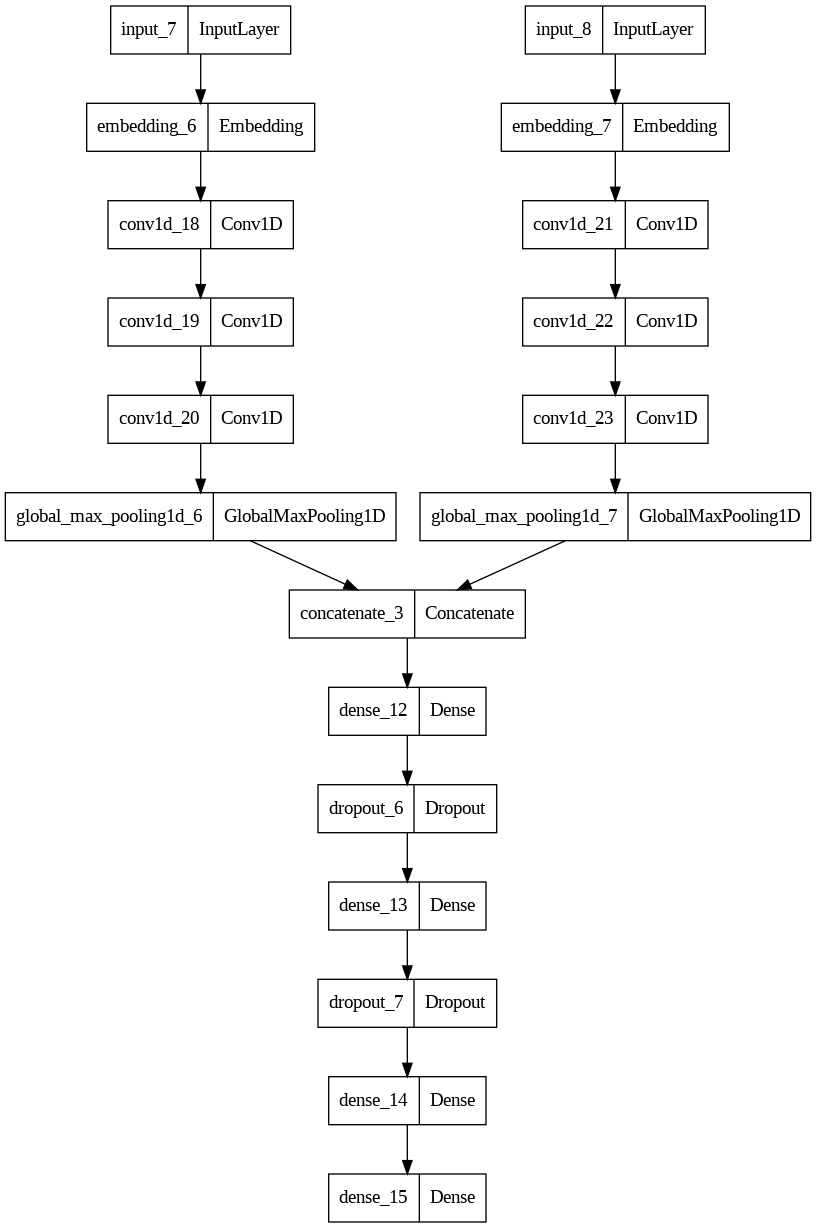

In [46]:
from keras.layers import Input, Embedding, Concatenate, Conv1D, GlobalAveragePooling1D, Dense, GlobalMaxPooling1D, Concatenate, Dense, Dropout
from keras.models import Model
from keras.models import Model

# Define the input layer
smiles_input = Input((85, ))
proteins_input = Input((1200, ))

# smiles encoder
embed_smiles = Embedding(vocab_size_smiles+1, 128, input_length=85)(smiles_input)
conv_smiles = Conv1D(32, 4, activation = "relu")(embed_smiles)
conv_smiles = Conv1D(64, 6, activation = "relu")(conv_smiles)
conv_smiles = Conv1D(96, 8, activation = "relu")(conv_smiles)
max_smiles = GlobalMaxPooling1D()(conv_smiles)

# proteins encoder
embed_proteins = Embedding(vocab_size_smiles+1, 128, input_length=85)(proteins_input)
conv_proteins = Conv1D(32, 4, activation = "relu")(embed_proteins)
conv_proteins = Conv1D(64, 6, activation = "relu")(conv_proteins)
conv_proteins = Conv1D(96, 8, activation = "relu")(conv_proteins)
max_proteins = GlobalMaxPooling1D()(conv_proteins)

# Concate the two encoder output
concat_layer = Concatenate()([max_smiles, max_proteins])

# decoder
output = Dense(1024, activation = "relu")(concat_layer)
output = Dropout(0.1)(output)
output = Dense(1024, activation = "relu")(output)
output = Dropout(0.1)(output)
output = Dense(512, activation = "relu")(output)
output = Dense(1)(output)

# define a model with a list of two inputs
model = Model(inputs = [smiles_input, proteins_input], outputs = output)
optimizer = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='mse', optimizer = optimizer, metrics=['mse'])
tf.keras.utils.plot_model(model)



In [43]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    mode="min",
    restore_best_weights=True,
)
history = model.fit([train_smiles_array, train_proteins_array], train_labels_array, epochs = 300, batch_size = 256, validation_data = ([test_smiles_array, test_proteins_array], test_labels_array), callbacks=[early_stopping])

Epoch 1/300
8/8 [==============================] - 2s 130ms/step - loss: 0.8561 - mse: 0.8561 - val_loss: 1.7644 - val_mse: 1.7644
Epoch 2/300
8/8 [==============================] - 0s 19ms/step - loss: 0.6636 - mse: 0.6636 - val_loss: 1.7711 - val_mse: 1.7711
Epoch 3/300
8/8 [==============================] - 0s 21ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 1.7417 - val_mse: 1.7417
Epoch 4/300
8/8 [==============================] - 0s 21ms/step - loss: 0.5006 - mse: 0.5006 - val_loss: 1.7218 - val_mse: 1.7218
Epoch 5/300
8/8 [==============================] - 0s 21ms/step - loss: 0.4388 - mse: 0.4388 - val_loss: 1.5994 - val_mse: 1.5994
Epoch 6/300
8/8 [==============================] - 0s 19ms/step - loss: 0.3973 - mse: 0.3973 - val_loss: 1.8974 - val_mse: 1.8974
Epoch 7/300
8/8 [==============================] - 0s 19ms/step - loss: 0.3975 - mse: 0.3975 - val_loss: 1.6084 - val_mse: 1.6084
Epoch 8/300
8/8 [==============================] - 0s 20ms/step - loss: 0.3634 - mse: 0.3

<Figure size 640x480 with 0 Axes>

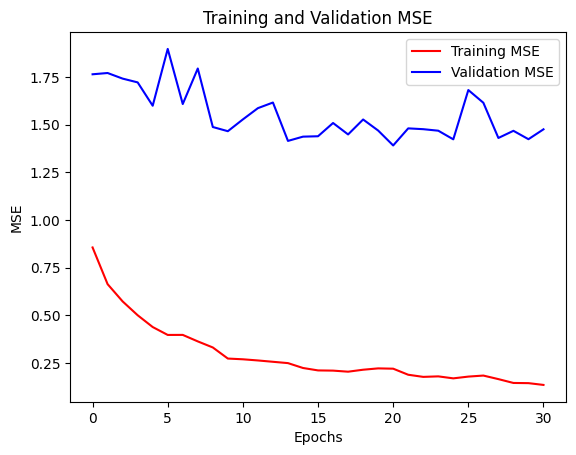

<Figure size 640x480 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt

mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, mse, 'r')
plt.plot(epochs, val_mse, 'b')
plt.title("Training and Validation MSE")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(["Training MSE", "Validation MSE"])

plt.figure()

In [45]:
model.save("DeepDTA_tmp.h5")